In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array(
    [
        [10000, 5, 10000],
        [15000, 6, 12000],
        [20000, 6, 13000],
        [9000, 5, 12000],
        [12000, 4, np.nan],
    ]
)
X = data[:, :-1]
y = data[:, -1]

mean_y = np.nanmean(y)
y[np.isnan(y)] = mean_y

In [ ]:
def simple_linear_regression(X_simple, y):
    X_simple_mean = np.mean(X_simple)
    y_mean = np.mean(y)
    beta1 = np.sum((X_simple - X_simple_mean) * (y - y_mean)) / np.sum(
        (X_simple - X_simple_mean) ** 2
    )
    beta0 = y_mean - beta1 * X_simple_mean
    y_pred = beta0 + beta1 * X_simple
    mse = np.mean((y - y_pred) ** 2)
    return beta0, beta1, y_pred, mse


def multi_linear_regression(X_multi, y):
    XTX = np.dot(X_multi.T, X_multi)
    XTX_inv = np.linalg.inv(XTX)
    XTy = np.dot(X_multi.T, y)
    beta = np.dot(XTX_inv, XTy)
    y_pred = np.dot(X_multi, beta)
    mse = np.mean((y - y_pred) ** 2)
    return beta, y_pred, mse

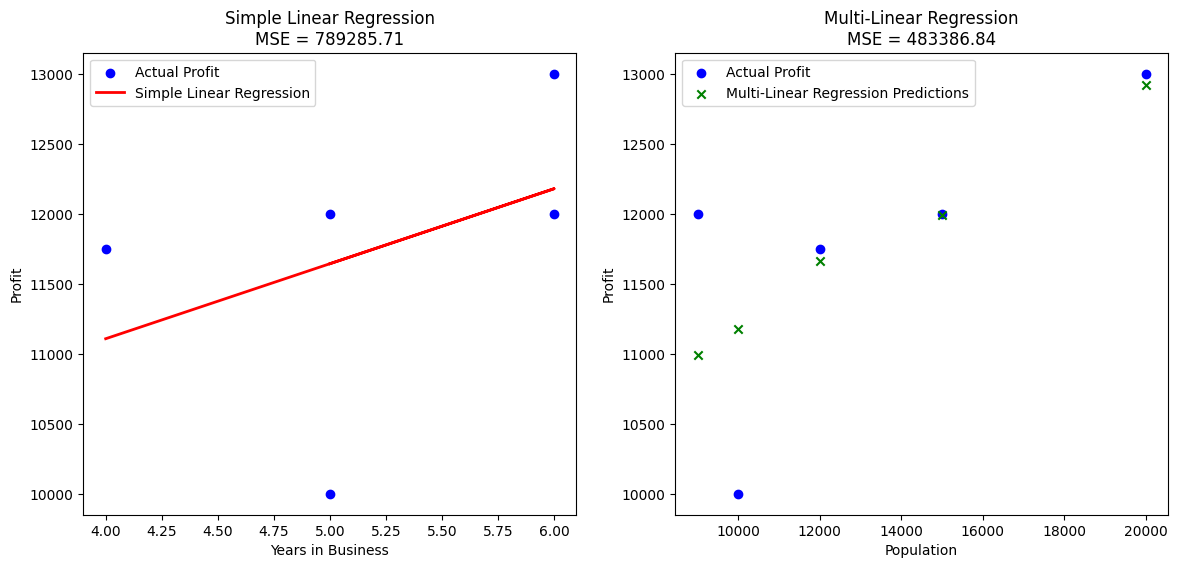

In [5]:
X_simple = X[:, 1]
beta0, beta1, y_pred_simple, mse_simple = simple_linear_regression(X_simple, y)
X_multi = np.hstack([np.ones((X.shape[0], 1)), X])
beta_multi, y_pred_multi, mse_multi = multi_linear_regression(X_multi, y)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_simple, y, color="blue", label="Actual Profit")
plt.plot(
    X_simple, y_pred_simple, color="red", linewidth=2, label="Simple Linear Regression"
)
plt.xlabel("Years in Business")
plt.ylabel("Profit")
plt.title(f"Simple Linear Regression\nMSE = {mse_simple:.2f}")
plt.legend()


plt.subplot(1, 2, 2)
X_population = X[:, 0]
plt.scatter(X_population, y, color="blue", label="Actual Profit")
plt.scatter(
    X_population,
    y_pred_multi,
    color="green",
    marker="x",
    label="Multi-Linear Regression Predictions",
)
plt.xlabel("Population")
plt.ylabel("Profit")
plt.title(f"Multi-Linear Regression\nMSE = {mse_multi:.2f}")
plt.legend()
plt.show()

In [6]:
print(f"Simple Linear Regression: Beta0 = {beta0}, Beta1 = {beta1}, MSE = {mse_simple}")
print(f"Multi-Linear Regression Coefficients = {beta_multi}, MSE = {mse_multi}")

Simple Linear Regression: Beta0 = 8964.285714285714, Beta1 = 535.7142857142858, MSE = 789285.7142857148
Multi-Linear Regression Coefficients = [ 9.89125201e+03  1.85393258e-01 -1.13162119e+02], MSE = 483386.8378812197


In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[10000], [15000], [20000], [9000]])
y = np.array([10000, 12000, 13000, 12000])

Population_mean = X.mean()
Population_std = X.std()
Population_normalized = (X - Population_mean) / Population_std

X = np.hstack((np.ones((X.shape[0], 1)), Population_normalized))
y = y

w = np.zeros(X.shape[1])

learning_rate = 0.01
n_iterations = 1000

In [5]:
def predict(X, w):
    return X.dot(w)


def compute_cost(X, y, w):
    m = len(y)
    predictions = predict(X, w)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost


def gradient_descent(X, y, w, learning_rate, n_iterations):
    m = len(y)
    cost_history = []

    for i in range(n_iterations):
        predictions = predict(X, w)
        errors = predictions - y
        gradients = (1 / m) * X.T.dot(errors)
        w -= learning_rate * gradients

        cost = compute_cost(X, y, w)
        cost_history.append(cost)

    return w, cost_history

Final weights: [11749.49273784   769.20068232]


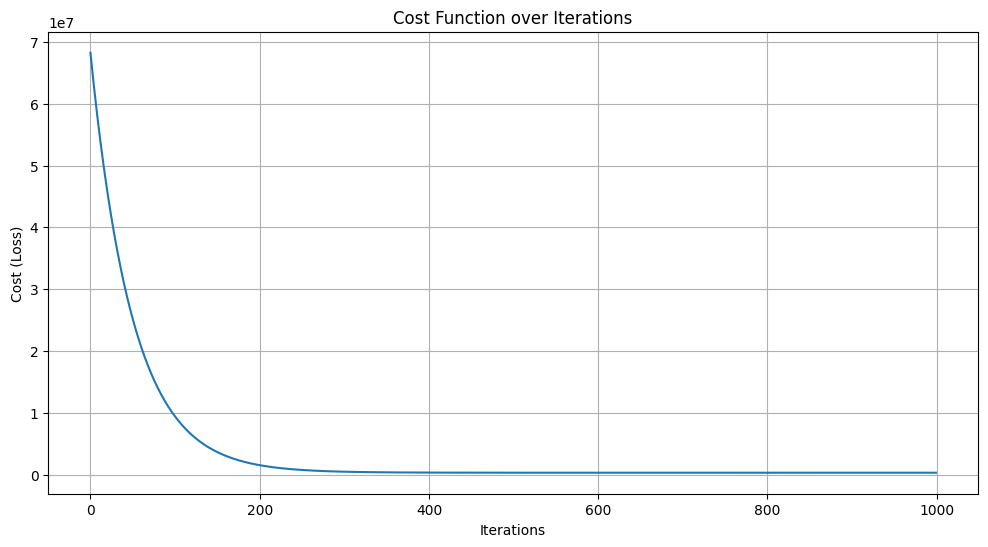

In [6]:
w, cost_history = gradient_descent(X, y, w, learning_rate, n_iterations)

print(f"Final weights: {w}")

plt.figure(figsize=(12, 6))

plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (Loss)")
plt.title("Cost Function over Iterations")
plt.grid(True)
plt.show()